# Import libraries

In [24]:
import pandas as pd
import numpy as np
import os
import config
from joblib import dump, load
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import wilcoxon
from utils import plot_longitudinal

# Compute GMHI2 scores

In [25]:
study = "P116"

In [26]:
gmhi2 = load(os.path.join(config.MODEL_DIR, "gmhi2_model.joblib"))
gmhi2

LogisticRegression(C=0.03, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [27]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features_val.csv"), index_col=[0, 1]).loc[study]
X.head()

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Hordeivirus|s__Barley_stripe_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cactus_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cucumber_green_mottle_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Paprika_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Tobacco_mild_green_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Deep_sea_thermophilic_phage_D6E,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Loktanella_phage_pCB2051_A,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Tetraselmis_viridis_virus_S1
Sample Accession,,,,,,,,,,,,,,,,,,,,,
SAMN12478567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478598,0.185493,0.185493,0.185493,0.185493,0.185493,0.185493,0.185493,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
meta = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata_val.csv"), index_col=[0, 1, 2]).loc[study]
meta["GMHI2"] = gmhi2.decision_function(X > config.PRESENCE_CUTOFF)
meta.index = meta.index.get_level_values(1)
meta.head()

,health_status/host_diet,timepoint,GMHI2
Subject_ID,,,
NaN,Rectal adenocarcinoma,NaN,-3.131723
31,Rectal adenocarcinoma,1,-1.770976
38,Gastric Adenocarcinoma,2,-0.999625
NaN,Lung Adenocarcinoma,NaN,-3.588520
NaN,Hepatobiliary cell carcinoma,NaN,-1.616434


# Compute other indices

In [29]:
X_species = X[[col for col in X.columns if "s__" in col and "virus" not in col and "unclassified" not in col]]
X_species.head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata|o__Methanomassiliicoccales|f__Methanomassiliicoccaceae|g__Methanomassiliicoccus|s__Candidatus_Methanomassiliicoccus_intestinalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinobaculum|s__Actinobaculum_sp_oral_taxon_183,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_cardiffensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_georgiae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_hongkongensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_johnsonii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_massiliensis,...,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Borreliaceae|g__Borreliella|s__Borreliella_garinii,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_lecithinolyticum,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_maltophilum,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_medium,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_vincentii,k__Bacteria|p__Synergistetes|c__Synergistia|o__Synergistales|f__Synergistaceae|g__Acetomicrobium|s__Acetomicrobium_flavidum,k__Bacteria|p__Synergistetes|c__Synergistia|o__Synergistales|f__Synergistaceae|g__Cloacibacillus|s__Cloacibacillus_sp_An23,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Acholeplasmatales|f__Acholeplasmataceae|g__Candidatus_Phytoplasma|s__Aster_yellows_witches_broom_phytoplasma,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_sp_HU2014
Sample Accession,,,,,,,,,,,,,,,,,,,,,
SAMN12478567,0.000000,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478592,0.000000,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478598,0.185493,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478593,0.000000,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN12478573,0.000000,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
meta["Species Richness"] = np.sum(X_species > config.PRESENCE_CUTOFF, axis=1).values
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness
Subject_ID,,,,
NaN,Rectal adenocarcinoma,NaN,-3.131723,62
31,Rectal adenocarcinoma,1,-1.770976,51
38,Gastric Adenocarcinoma,2,-0.999625,89
NaN,Lung Adenocarcinoma,NaN,-3.588520,90
NaN,Hepatobiliary cell carcinoma,NaN,-1.616434,74


In [31]:
meta["Shannon Diversity"] = np.sum(-1 * (X_species * np.log(X_species)).fillna(0).values, axis=1)
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity
Subject_ID,,,,,
NaN,Rectal adenocarcinoma,NaN,-3.131723,62,2.688974
31,Rectal adenocarcinoma,1,-1.770976,51,2.318469
38,Gastric Adenocarcinoma,2,-0.999625,89,2.980731
NaN,Lung Adenocarcinoma,NaN,-3.588520,90,2.792643
NaN,Hepatobiliary cell carcinoma,NaN,-1.616434,74,2.061727


In [36]:
meta = meta[~meta["timepoint"].isna()]

# Plot stuff now 

In [38]:
meta["timepoint_plot"] = [int(time) - 1 for time in meta["timepoint"]]
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity,timepoint_plot
Subject_ID,,,,,,
31,Rectal adenocarcinoma,1,-1.770976,51,2.318469,0
38,Gastric Adenocarcinoma,2,-0.999625,89,2.980731,1
49,Rectal adenocarcinoma,2,-1.761953,91,3.003410,1
37,Hepatobiliary cell carcinoma,1,-1.420052,45,2.356173,0
35,Lung Adenocarcinoma,1,-1.699935,30,2.004585,0


In [40]:
timepoints_sorted = sorted(list(meta["timepoint"].unique()))
timepoints_sorted

['1', '2']

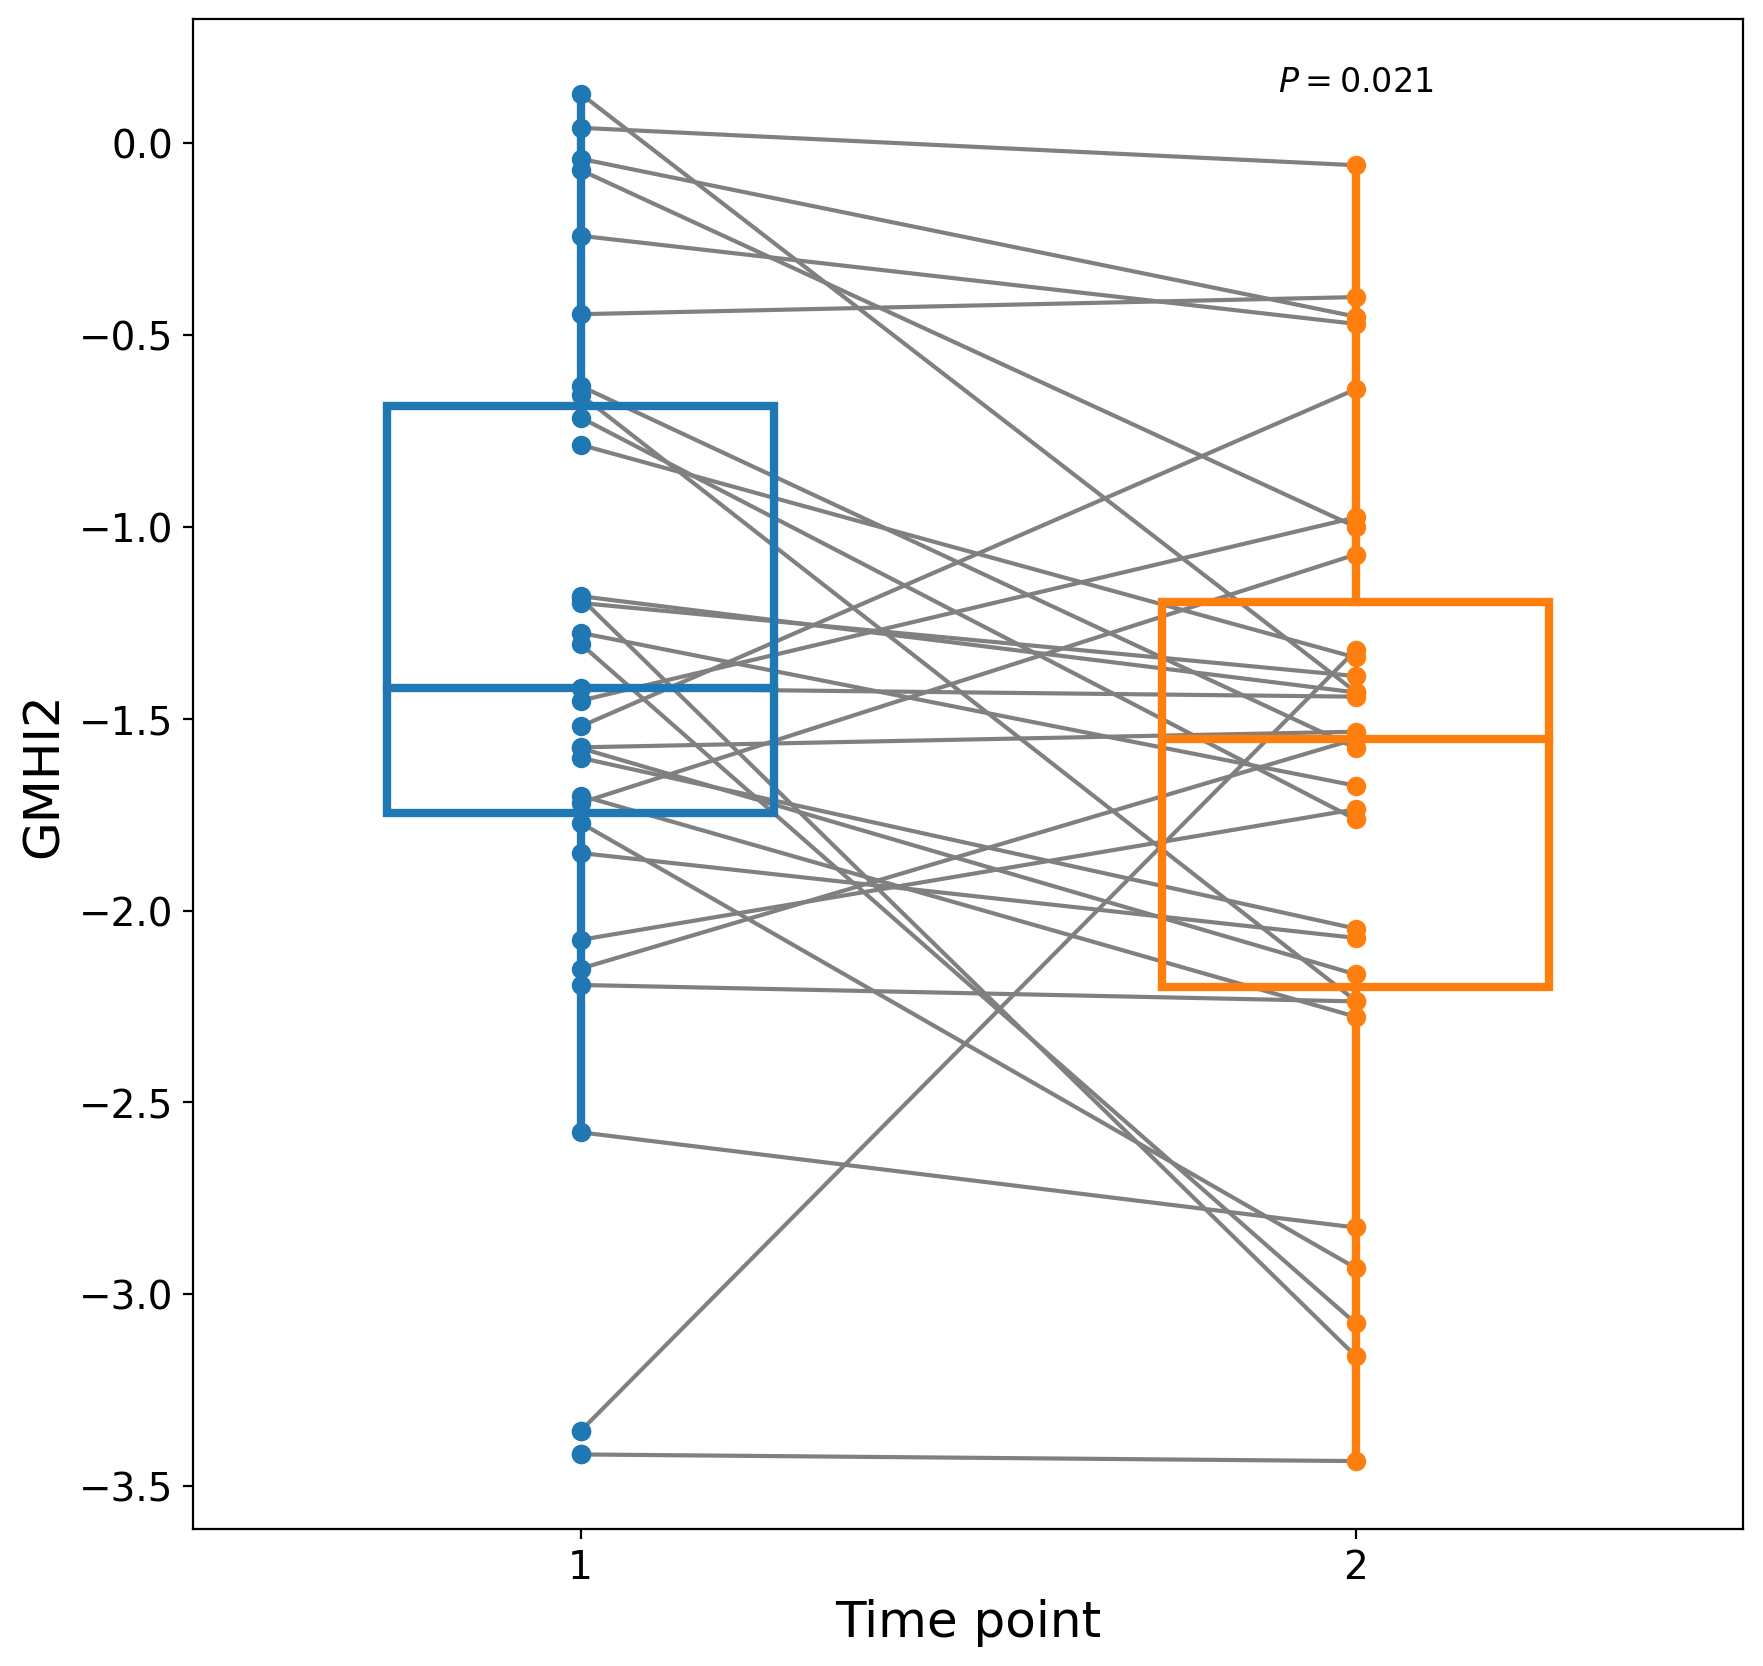

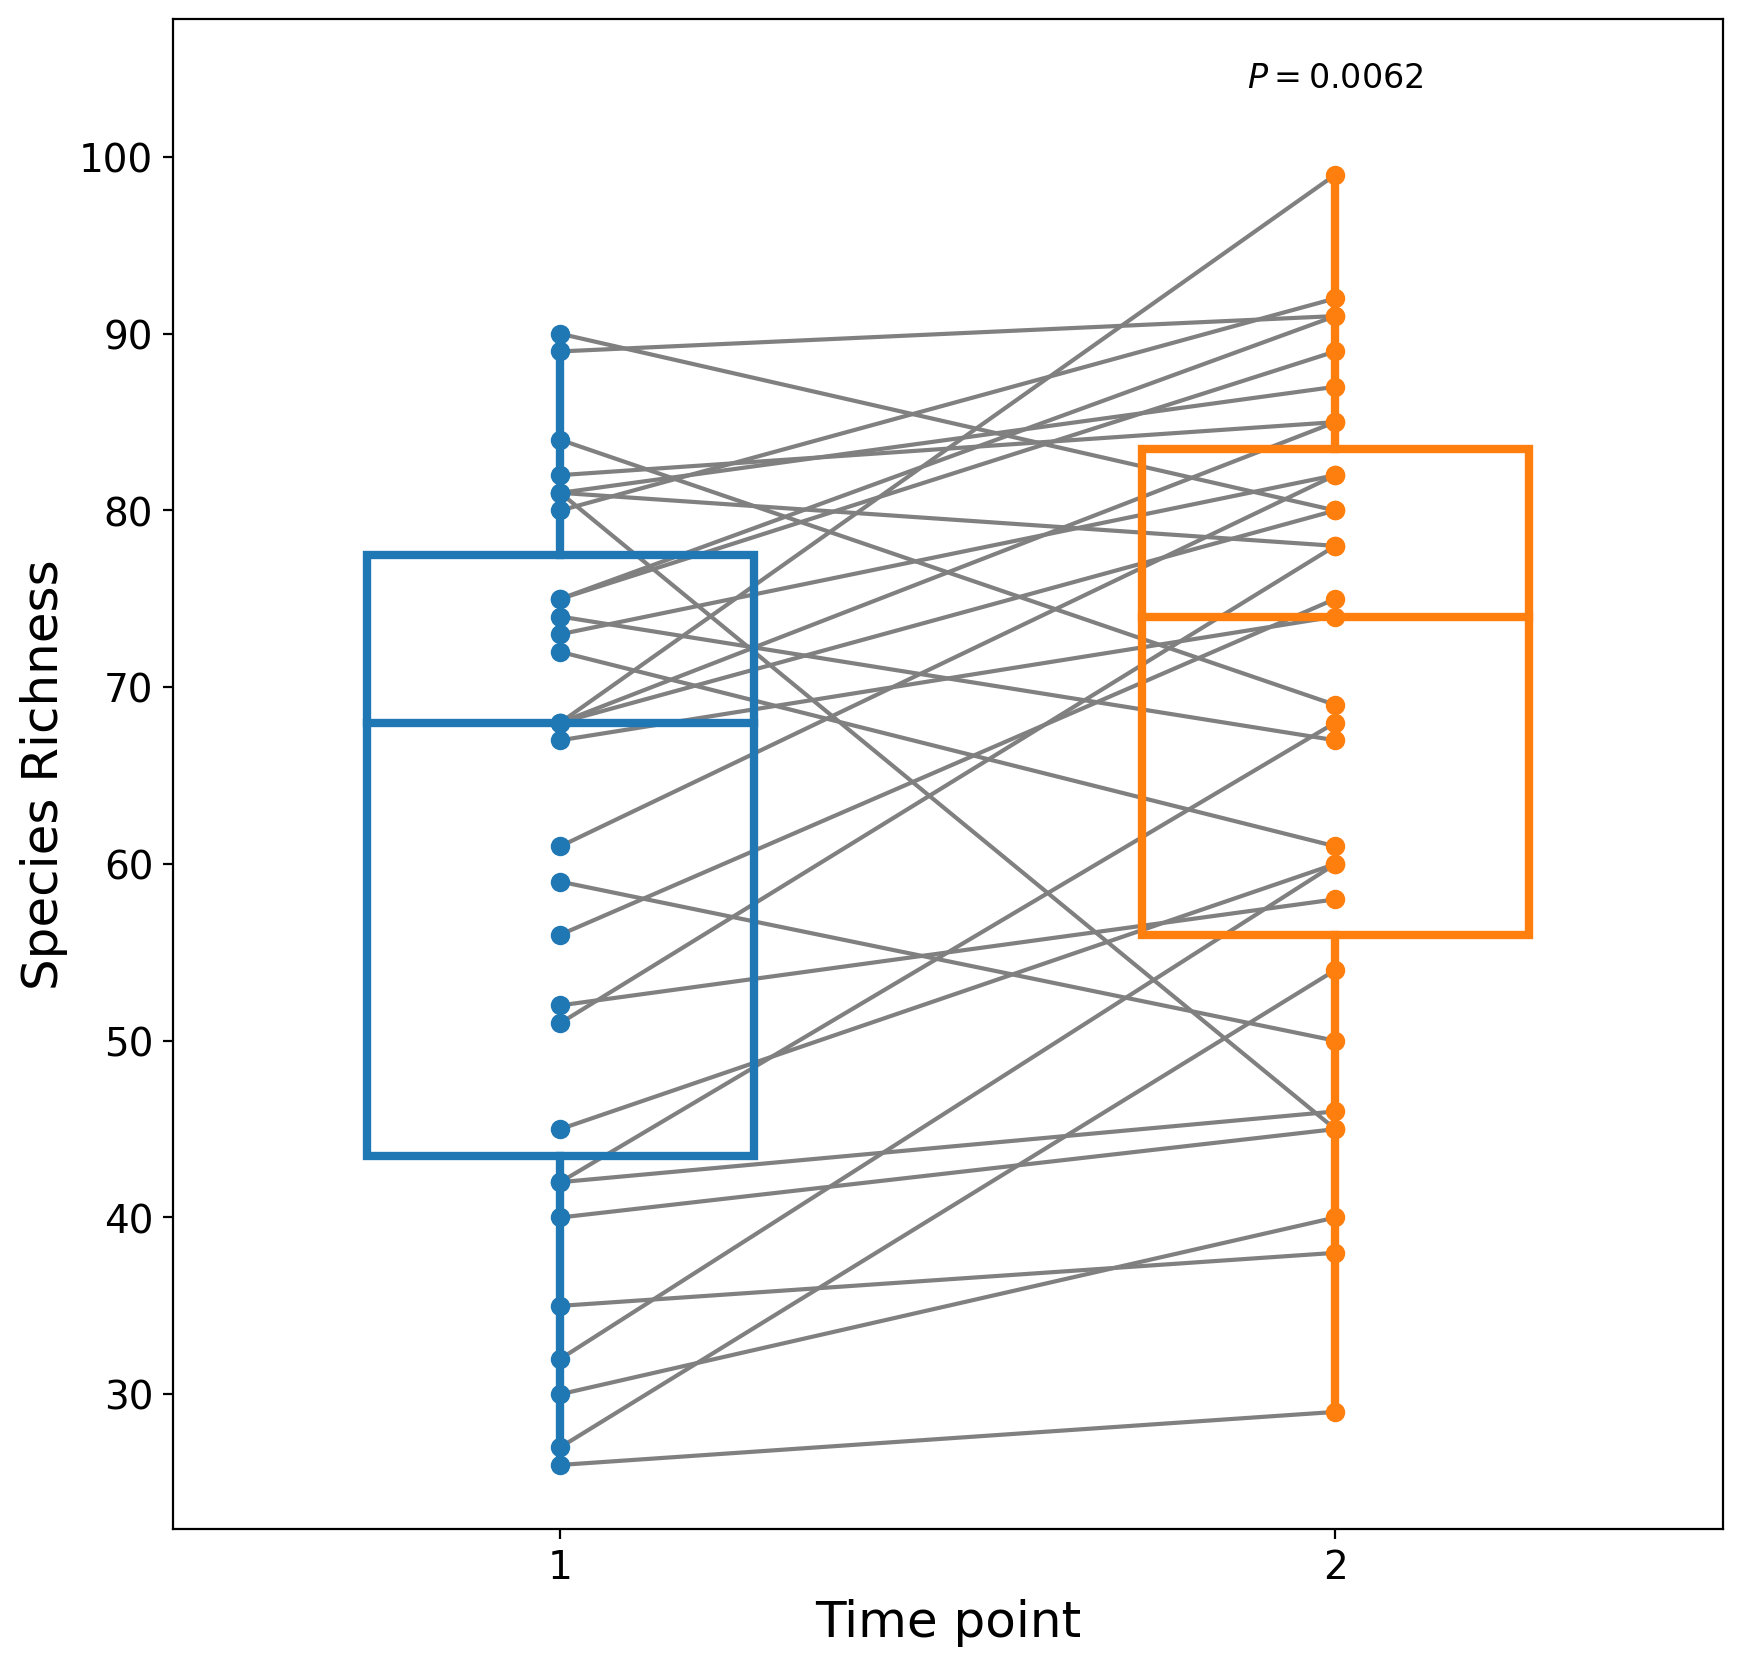

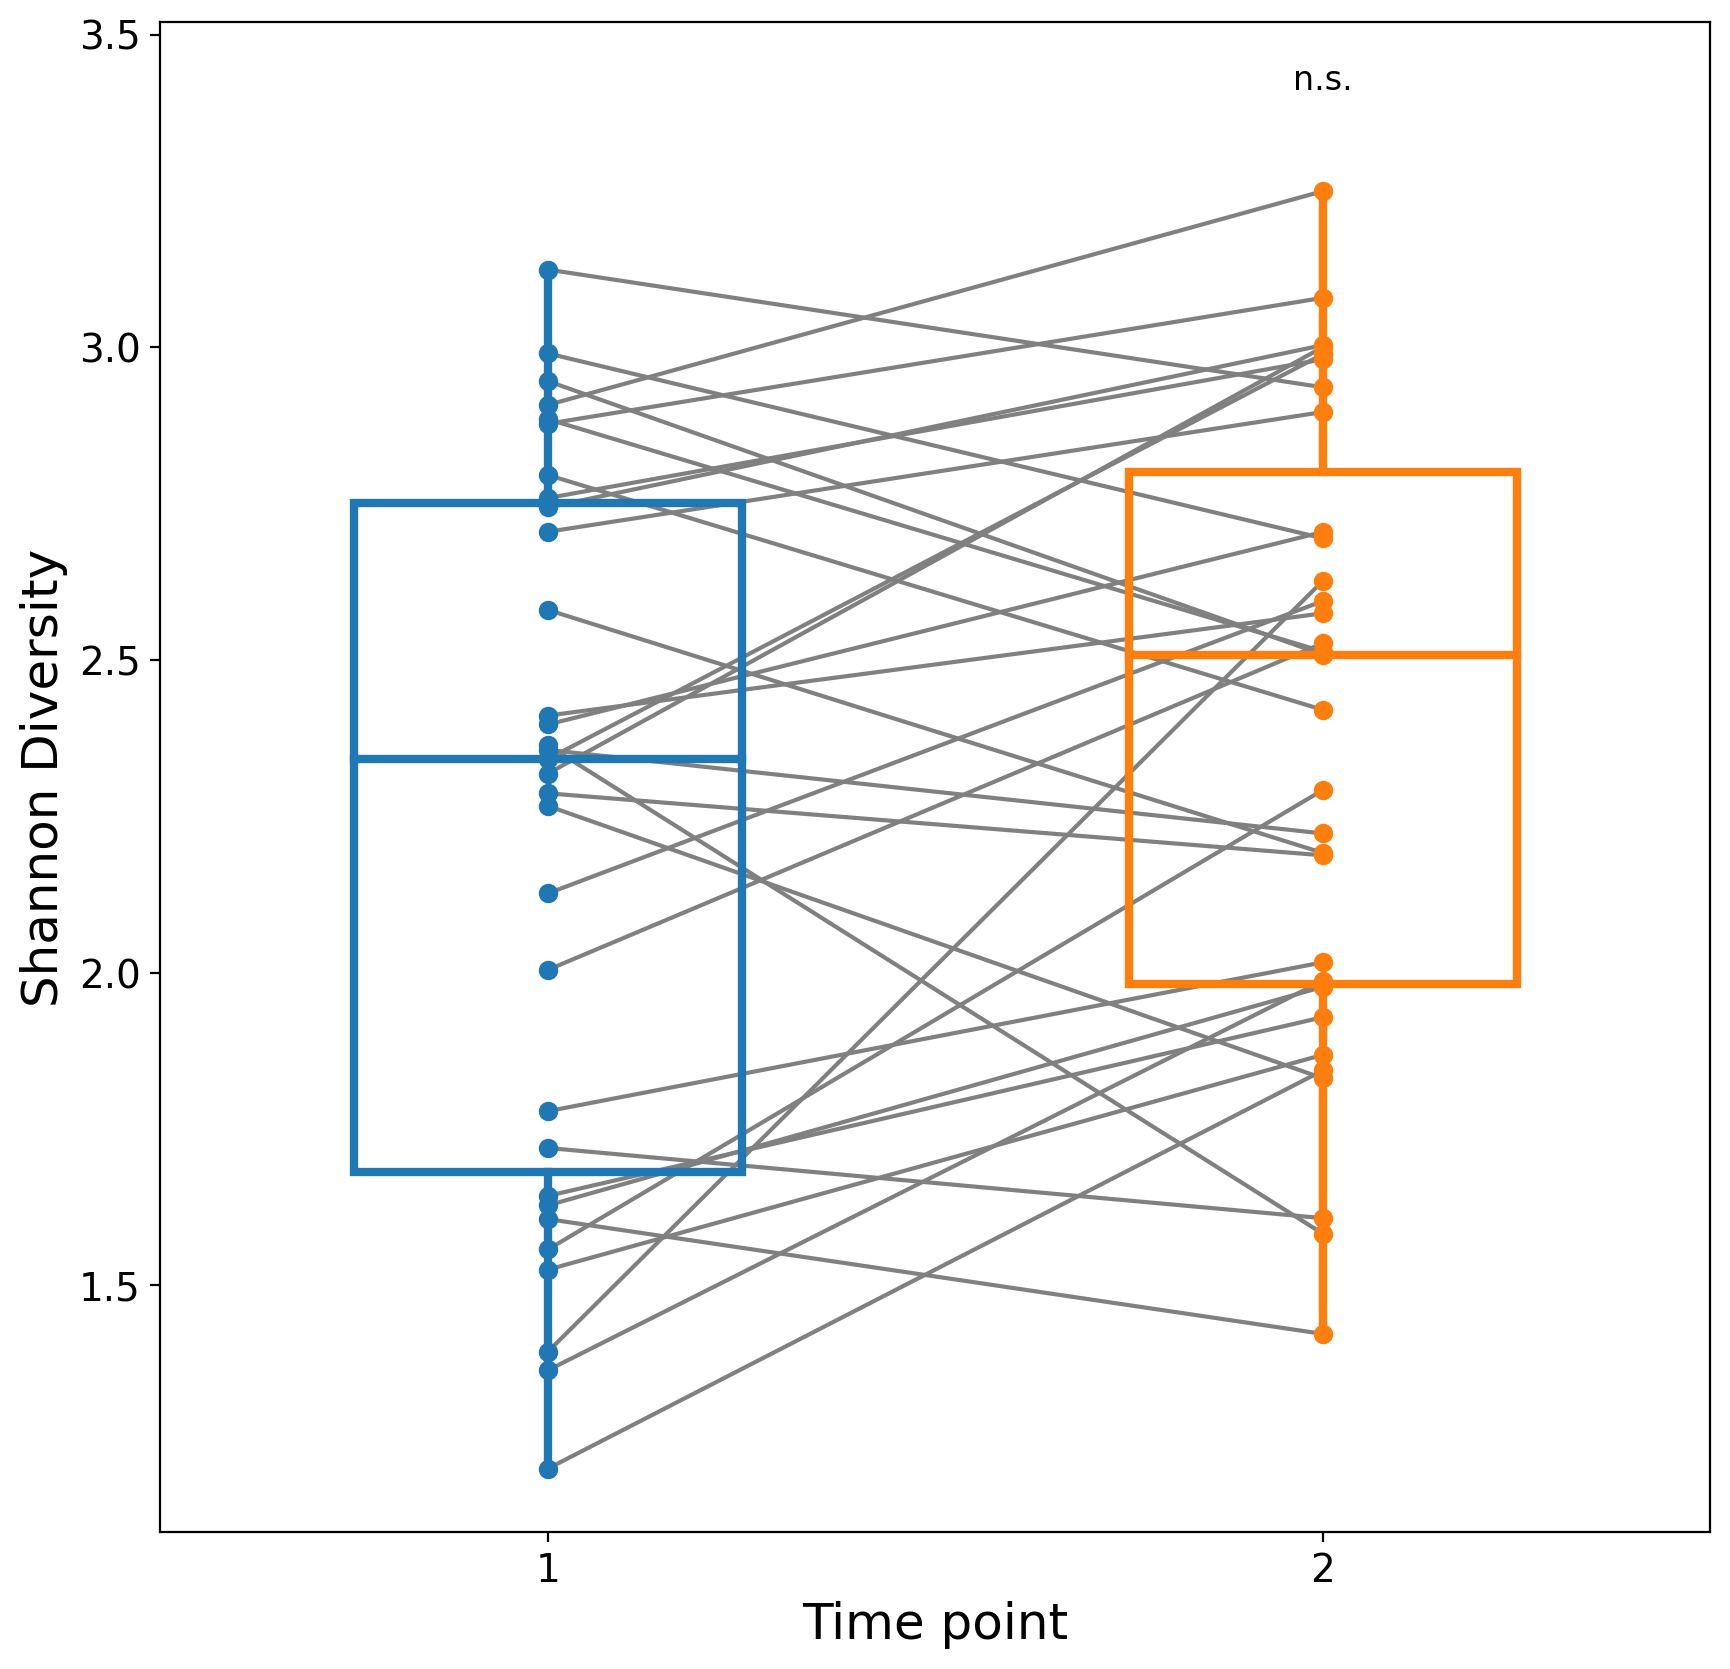

In [41]:
plot_longitudinal(meta, "GMHI2", timepoints_sorted, study)
plot_longitudinal(meta, "Species Richness", timepoints_sorted, study)
plot_longitudinal(meta, "Shannon Diversity", timepoints_sorted, study)